In [6]:
#directory change to not to write the entire directory of the data files
import os
import pandas as pd
import matplotlib.pyplot as plt

# Importing the libraries
import pandas as pd
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import nltk
nltk.download('stopwords')

import io

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
os.chdir ("/home/apprenant/PycharmProjects/pythonProject/foodflix/File/02_Cleaned")

In [8]:
listings=pd.read_csv('food_facts_fr.csv',error_bad_lines=False).sample(20000)

In [15]:
listings['id']=listings.index

listings=listings[['id','product_name','brands']]

#index_with_nan = listings.index[listings.iloc[:,1].isnull()]
#listings.drop(index_with_nan,0, inplace=True)
#listings.head(5)
listings.reset_index(inplace=True)


In [17]:
listings.drop('index',axis=1)

,id,product_name,brands
0,26121,quinoa tomate olive doy pack bjorg,bjorg
1,71152,100% pur jus multifruits exotique,"bio village,marque repère"
2,108580,houmous végan apéro,mieux manger
3,70887,corn flakes,brin de jour
4,19822,twinuts goût cheese,bénenuts
...,...,...,...
19995,21064,potabio tomate basilic pauvre en sel,natali
19996,19834,"pop corn apéro, goût salé","bénénuts,pepsico,bénénuts pop corn apéro"
19997,37846,pistaches,NaN
19998,62645,accras de morue &quot;créole&quot;,cité marine


In [9]:
listings['combine']=listings['product_name']+' ' + listings['brands']
listings.head(5)

,product_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_en,countries_en,ingredients_text,...,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,combine
26121,quinoa tomate olive doy pack bjorg,NaN,NaN,NaN,bjorg,NaN,NaN,NaN,france,cuisiné biologique préparé à base de quinoa bl...,...,0.8,20.00,0.9,5.4,5.50,1.10,0.433071,-2.0,-2.0,quinoa tomate olive doy pack bjorg bjorg
71152,100% pur jus multifruits exotique,NaN,NaN,NaN,"bio village,marque repère","jus multifruits,jus de fruits 100% pur jus","en:plant-based-foods-and-beverages,en:beverage...","plant-based foods and beverages,beverages,plan...",france,NaN,...,0.1,NaN,12.0,0.5,0.50,0.10,0.039370,5.0,-3.0,"100% pur jus multifruits exotique bio village,..."
108580,houmous végan apéro,170 g,"pot,plastique,frais","pot,plastique,frais",mieux manger,houmous,"en:plant-based-foods-and-beverages,en:plant-ba...","plant-based foods and beverages,plant-based fo...",france,"pois chiches (41 %), eau, pâte de _graines de ...",...,2.3,13.87,1.0,NaN,7.45,1.17,0.460630,5.0,5.0,houmous végan apéro mieux manger
70887,corn flakes,NaN,NaN,NaN,brin de jour,NaN,NaN,NaN,france,NaN,...,0.4,NaN,28.0,2.6,6.40,1.50,0.590551,13.0,13.0,corn flakes brin de jour
19822,twinuts goût cheese,150 g,"sachet,plastique","sachet,plastique",bénenuts,"snacks salés,apéritif,biscuits apéritifs","en:salty-snacks,en:appetizers,en:crackers","salty snacks,appetizers,crackers",france,"_cacahuètes_ (43 %), biscuit aromatisé [farine...",...,5.2,43.00,6.2,5.7,15.00,2.00,0.787402,15.0,15.0,twinuts goût cheese bénenuts


 ### Exploratory Data Analysis

Are there certain words that figure more often in listings' name and description? I suspect there are some words which are occured more frequently and considered more worthy of a title. Let us find out!

In [141]:
'''
stop=stopwords.words('french')
product_name_stop= pd.DataFrame(listings['product_name'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])))
'''

"\nstop=stopwords.words('french')\nproduct_name_stop= pd.DataFrame(food_facts['product_name'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])))\n"

In [142]:
listings['combine']=listings['combine'].astype('str')
listings['product_name']= listings['product_name'].astype('str')
listings['brands'] = listings['brands'].astype('str')

In [143]:
product_name_corpus = ' '.join(product_name_stop['product_name'].astype('str'))
brands_corpus = ' '.join(listings['brands'])

In [128]:
product_name_stop

,product_name
0,"cueillette verger, pêche blanche cerise"
1,"sveltesse, encas mangue-passion"
2,l'instant espresso intense
3,pains saucisse
4,grany coeur fondant tout chocolat
...,...
12905,maggie &quot;chili con carne&quot;
12906,noix cajou grillées salées
12907,cornichons extra-fins
12908,sappy cocktail 9 vitamins


In [ ]:
from nltk.stem import SnowballStemmer

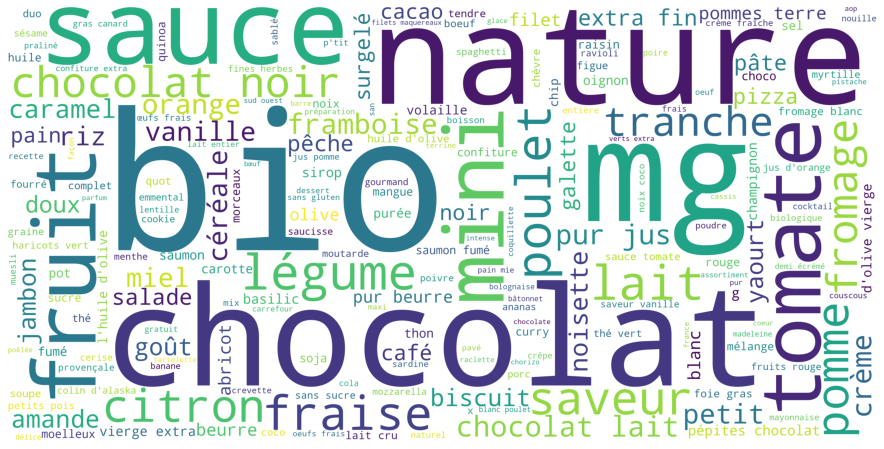

In [144]:
name_wordcloud = WordCloud(background_color = 'white', height = 2000, width = 4000).generate(product_name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

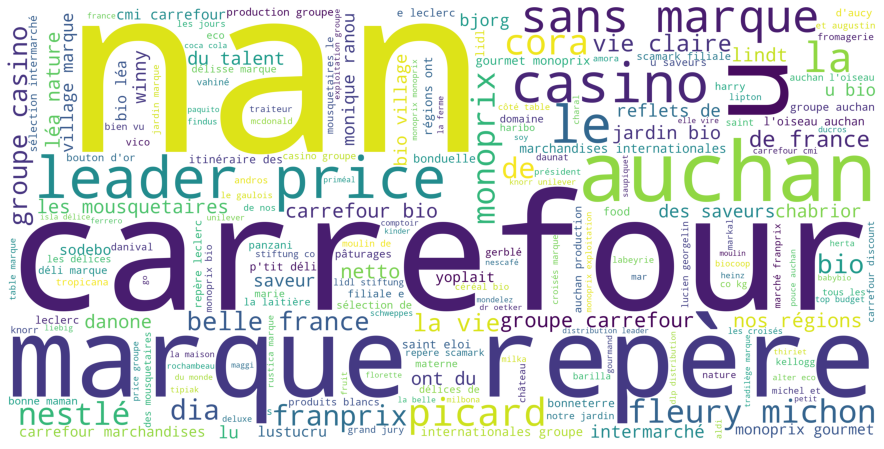

In [145]:
description_wordcloud = WordCloud( background_color = 'white', height = 2000, width = 4000).generate(brands_corpus)
plt.figure(figsize = (16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()

#### Now, we create a column containing a combination of product_name and brands columns that is important for content-based recommendation system

### TF-IDF (Term Frequency - Inverse Document Frequency)

Create a TF-IDF matrix of unigrams and bigrams for each id or room. The “stop words” parameter tells the TF-IDF module to ignore common English words like 'the', ‘about’, etc. TF-IDF will parse through the descriptions, identify distinct phrases in each item's description, and then find similar contents based on those phrases. Formula is below:

𝑤(𝑖,𝑗)=〖𝑡𝑓〗(𝑖,𝑗) x log⁡(𝑁/〖𝑑𝑓〗_𝑖 )

𝑡𝑓〗_(𝑖,𝑗) = number of occurrences of i in j; 〖𝑑𝑓〗_𝑖 = number of documents containing i; 𝑁 = total number of documents

In [147]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(listings['combine'])

### Cosine Similarity¶

Cosine Similarity calculates similarity by measuring the cosine angle between two vectors. Vectors are converted from contents by TF-IDF and this measurement will identify which contents are closest to each other.


cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [148]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

#### Iterate through each item's similar items and store the 100 most-similar!

In [149]:
listings.tail()

,index,product_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_en,countries_en,...,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,combine
12908,108171,pisang ambon,70 cl,"bouteille,verre","bouteille,verre",pisang ambon,liqueurs,"en:beverages,en:alcoholic-beverages,en:liqueurs","beverages,alcoholic beverages,liqueurs",france,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pisang ambon // pisang ambon
12909,19085,le bon brie,200 g,"film papier,point vert","film-papier,point-vert",cœur de lion,"produits laitiers,fromages,fromages de vache,f...","en:dairies,en:cheeses,en:cow-cheeses,en:french...","dairies,cheeses,cow cheeses,french cheeses,sof...",france,...,22.0,1.0,0.5,NaN,17.0,1.40,0.551181,15.0,20.0,le bon brie // cœur de lion
12910,23521,plaisir gourmand nature,400 g (4 x 100 g),"pot,plastique,frais","pot,plastique,frais",casino,"produits laitiers,fromages à pâte fraîche","en:dairies,en:cheeses,en:cream-cheeses","dairies,cheeses,cream cheeses",france,...,7.2,3.8,3.1,NaN,6.6,0.08,0.031496,4.0,4.0,plaisir gourmand nature // casino
12911,50249,moutarde à l'ancienne bio,700g,bocal,bocal,la cuisine d'autrefois,"epicerie,condiments,sauces,moutardes,moutardes...","en:groceries,en:condiments,en:sauces,en:mustar...","groceries,condiments,sauces,mustards,old style...",france,...,1.0,2.7,2.0,NaN,7.3,5.80,2.283465,12.0,12.0,moutarde à l'ancienne bio // la cuisine d'autr...
12912,88681,mon premier biscuit,4 sachets,"carton,sachets","carton,sachets",hipp biologique,"en:sugary-snacks, en:biscuits-and-cakes, en:bi...","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","sugary snacks,biscuits and cakes,biscuits,ro:b...",france,...,7.3,76.5,21.5,2.1,10.1,0.26,0.102362,15.0,15.0,mon premier biscuit // hipp biologique


In [154]:
results = {}
for idx, row in lisitings.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], listings['index'][i]) for i in similar_indices]
    results[row['index']] = similar_items[1:]

In [168]:
def item(id):
    name   = listings.loc[listings['index'] == id]['combine'].tolist()[0].split(' // ')[0]
    desc   = ' \nDescription: ' + listings.loc[listings['index'] == id]['combine'].tolist()[0].split(' // ')[1][0:165] + '...'
    prediction = name  + desc
    print(prediction)
    return prediction

def recommend(item_id, num):
    print (item_id)
    print('Recommending ' + str(num) + ' products similar to ' + item(item_id))
    print('---')
    recs = results[item_id][:num]
    for rec in recs:
        print('\nRecommended: ' + item(rec[1]) + '\n(score:' + str(rec[0]) + ')')

In [169]:
recommend(item_id = 1292, num = 5)


1292


IndexError: list index out of range